# **FAIKR Module-3** <br>
### Submitted by **Pratiksha Pratiksha** <br>
### Submitted to- **Prof. Paolo Torroni**

### **INTRODUCTION** <br>
Mushrooms are a type of fungi and they belong to a kingdom of their own, and are not a part of plants and animals. It is fleshy, spore-bearing fruiting body of a fungus, typically produced above ground, on soil, or on its food source. Mushrooms are great in variety and there are around 14000 species found till date Out of this vast number of species, approximately 100 are toxic.
The poisonous mushrooms contain different types of toxins that can differ in toxicity. The symptoms may vary from gastric upset which can cause vomiting, diarrhoea (requires hospitalization sometimes) to organ failure resulting in death. The symptoms always do not occur immediately after consumption, often not until the toxins attack the kidney or liver. Sometimes it may take days or weeks for the symptoms to occur. 
 
A majority of these cases are due to misidentification. A lot of mushrooms look alike where one is edible and another one is poisonous. It is normal to get confused. Multiple cases have been reported where the victim had limited experience in identifying the mushroom and realised when the symptoms showed days later. Many times mushroom poisoning is the result of small children or pet animals ingesting the mushrooms grown in lawn or parks when left unsupervised. 
 
Mushroom poisoning is a public health problem and this needs to be taken seriously. People need to be educated about this and have some idea about identifying the difference between edible and non-edible ones. There are a lot of classifications made already but new species of mushrooms are discovered every year so the old classification is not sufficient in describing whether a particular species is harmful or edible for humans. 
 
Different species of mushrooms may look similar and can only be distinguished but few specific attributes. Thus differentiating the edible and poisonous mushroom is not a very easy task. There are two approaches to identify whether the mushroom is edible or not- image data or attribute based research. 
The attribute based research relies on one specific dataset and we are going to use this approach to identify whether or not a mushroom is edible. 
 
I will use a Bayesian network to find the probability of a mushroom being edible. I have taken the dataset from UCI and this data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. 

#### **The Report is organized as follows:** <br>
1.A breif descripition of the datset used/Data Manipulation <br>
2.Data Cleaning and Data Exploration <br>
3.A detail view of Bayesian Model/CPT <br>
4.Independencies <br>
5.Markov Blanket and Active Trails <br>
6.Variable Elimination Queries <br>
7.References

In [1]:
# installing pgmpy
!pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 6.6 MB/s 


####**IMPORTING LIBRARIES** 

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from pgmpy.models import BayesianModel
from sklearn import tree
import seaborn as sns
import networkx as nx
from IPython.core.display import display, HTML
from pgmpy.estimators import BayesianEstimator, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

####**READING CSV FILE**

In [40]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#### **DESCRIPTION OF THE INPUT VARIABLES**

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

1. **cap-shape**: bell = b, conical = c, convex = x, flat = f, knobbed = k, sunken = s
2. **cap-surface**: fibrous = f, grooves = g, scaly = y, smooth = s
3. **cap-color**: brown = n, buff = b, cinnamon = c, gray = g, green = r, pink = p, purple = u, red = e, white = w, yellow = y
4. **bruises?**: bruises = t, no = f
5. **odor**: almond = a, anise = l, creosote = c, fishy = y, foul = f, musty = m, none = n, pungent = p, spicy = s
6. **gill-attachment**: attached = a, descending = d, free = f, notched = n
7. **gill-spacing**: close = c, crowded = w, distant = d
8. **gill-size**: broad = b, narrow = n
9. **gill-color**: black = k, brown = n, buff = b, chocolate = h, gray = g, green = r, orange = o, pink = p, purple = u, red = e, white = w, yellow = y
10. **stalk-shape**: enlarging = e, tapering = t
11. **stalk-root**: bulbous = b, club = c, cup = u, equal = e, rhizomorphs = z, rooted = r, missing = ?
12. **stalk-surface-above-ring**: fibrous = f, scaly = y, silky = k, smooth = s
13. **stalk-surface-below-ring**: fibrous = f, scaly = y, silky = k, smooth = s
14. **stalk-color-above-ring**: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y
15. **stalk-color-below-ring**: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y
16. **veil-type**: partial = p, universal = u
17. **veil-color**: brown = n, orange = o, white = w, yellow = y
18. **ring-number**: none = n, one = o, two = t
19. **ring-type**: cobwebby = c, evanescent = e, flaring = f, large = l, none = n, pendant = p, sheathing = s, zone =z
20. **spore-print-color**: black = k, brown = n, buff = b, chocolate = h, green = r, orange = o, purple = u, white = w, yellow = y
21. **population**: abundant = a, clustered = c, numerous = n, scattered = s, several = v, solitary = y
22. **habitat**: grasses = g, leaves = l, meadows = m, paths = p, urban = u, waste = w, woods = d



### **DATA CLEANING AND EXPLORATION**

A **veil** or velum, in mycology, is one of several structures in fungi, especially the thin membrane that covers the cap and stalk of an immature mushroom. According to alot of researchers the viel does not affect the edibility of a mushroom very much so I have dropped those attributes

Among the stalk and cap variables, the stalk variables will determine the edibility as they are connected directly to the root and supply to the caps. Only cap-color is related to the nutrition value of the mushroom however, it is less important than stalk variables according the variable importances on the given data by random forest.

The gill-spacing and gill-attachment is pretty random accross the different species and it is the gill-color that changes with higher levels of toxins present, thus , we can rely on gill-color for some information on edibility.

The variables spore-print-color and odor are directly related to the nutritive value of the mushroom. They not only indicate that the mushroom is edible or not but also give information about how nutritive it may be.

Thus, we select the following features as shown in the code block below.

In [41]:
# according to researches veil variables do not affect the edibility of a mushroom
cols_to_consider = ['class', 'odor', 'gill-color', 'ring-type', 'stalk-root', 'gill-size', 'stalk-surface-above-ring', 'spore-print-color', 'population', 'bruises', 'ring-number', 'stalk-shape', 'stalk-surface-below-ring']
print(cols_to_consider)

['class', 'odor', 'gill-color', 'ring-type', 'stalk-root', 'gill-size', 'stalk-surface-above-ring', 'spore-print-color', 'population', 'bruises', 'ring-number', 'stalk-shape', 'stalk-surface-below-ring']


In [42]:
df = df[cols_to_consider]

In [43]:
df.shape

(8124, 13)

In [44]:
# observing unique values in the dataframe
for col in list(df.columns):
    print(col, set(df[col]))

class {'e', 'p'}
odor {'y', 'n', 'p', 'l', 's', 'f', 'c', 'a', 'm'}
gill-color {'y', 'o', 'k', 'n', 'u', 'p', 'b', 'r', 'w', 'h', 'g', 'e'}
ring-type {'n', 'p', 'l', 'f', 'e'}
stalk-root {'b', 'r', 'c', 'e', '?'}
gill-size {'n', 'b'}
stalk-surface-above-ring {'s', 'k', 'f', 'y'}
spore-print-color {'y', 'o', 'u', 'k', 'n', 'b', 'r', 'w', 'h'}
population {'y', 'n', 'v', 's', 'c', 'a'}
bruises {'t', 'f'}
ring-number {'t', 'o', 'n'}
stalk-shape {'t', 'e'}
stalk-surface-below-ring {'s', 'k', 'f', 'y'}


In [45]:
df.describe()

,class,odor,gill-color,ring-type,stalk-root,gill-size,stalk-surface-above-ring,spore-print-color,population,bruises,ring-number,stalk-shape,stalk-surface-below-ring
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,9,12,5,5,2,4,9,6,2,3,2,4
top,e,n,b,p,b,b,s,w,v,f,o,t,s
freq,4208,3528,1728,3968,3776,5612,5176,2388,4040,4748,7488,4608,4936


### **Preprocessing and Data Exploration** <br>

*   Removal of Null Values: No values were not present for any of the features. 
The column stalk-root has a '?' which indivates the absence of stalk root and has been considered as an accepted value.
*   The features of the mushroom were categorical which suits the requirement of the bayesian model.
*   Label Encoding the values in each column to numeric values, so that they can be used by the Bayesian Model.
*   We use the random forest classifier to check the variable importances and the relations among the features. 
(This is helpful for the bayesian model)
*   We also plot the heatmap for all the features and the class. 
A heatmap is a good tool to describe the relationship between features taken two at a time.
*   Thus, we exploit the numeric relations described in the heatmap to identify strong positive and strong negative relations 
among the features and with the output to use for the Bayesian model.

In [47]:
# collecting categorical columns
cols = list(df.columns)
cat_columns = []
for col in cols:
    if df[col].dtypes == 'object':
        cat_columns.append(col)

In [48]:
# label encoding categorical columns
encoding_dict = {}
for cat_col in cat_columns:
    label_encoder = LabelEncoder()
    df[cat_col] = label_encoder.fit_transform(df[cat_col])
    encoding_dict[cat_col] = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

In [49]:
print(encoding_dict)

{'class': {0: 'e', 1: 'p'}, 'odor': {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'}, 'gill-color': {0: 'b', 1: 'e', 2: 'g', 3: 'h', 4: 'k', 5: 'n', 6: 'o', 7: 'p', 8: 'r', 9: 'u', 10: 'w', 11: 'y'}, 'ring-type': {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'}, 'stalk-root': {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'}, 'gill-size': {0: 'b', 1: 'n'}, 'stalk-surface-above-ring': {0: 'f', 1: 'k', 2: 's', 3: 'y'}, 'spore-print-color': {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'}, 'population': {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y'}, 'bruises': {0: 'f', 1: 't'}, 'ring-number': {0: 'n', 1: 'o', 2: 't'}, 'stalk-shape': {0: 'e', 1: 't'}, 'stalk-surface-below-ring': {0: 'f', 1: 'k', 2: 's', 3: 'y'}}


In [14]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(["class"], axis = 1)
y = df['class']

clf = RandomForestClassifier(n_estimators = 10, max_depth = 5, random_state = 42)
clf.fit(X, y)
print(clf.feature_importances_)

[0.06002433 0.14369529 0.12236401 0.01502022 0.18417183 0.05863459
 0.22466572 0.10905106 0.01982388 0.00770746 0.02225501 0.0325866 ]


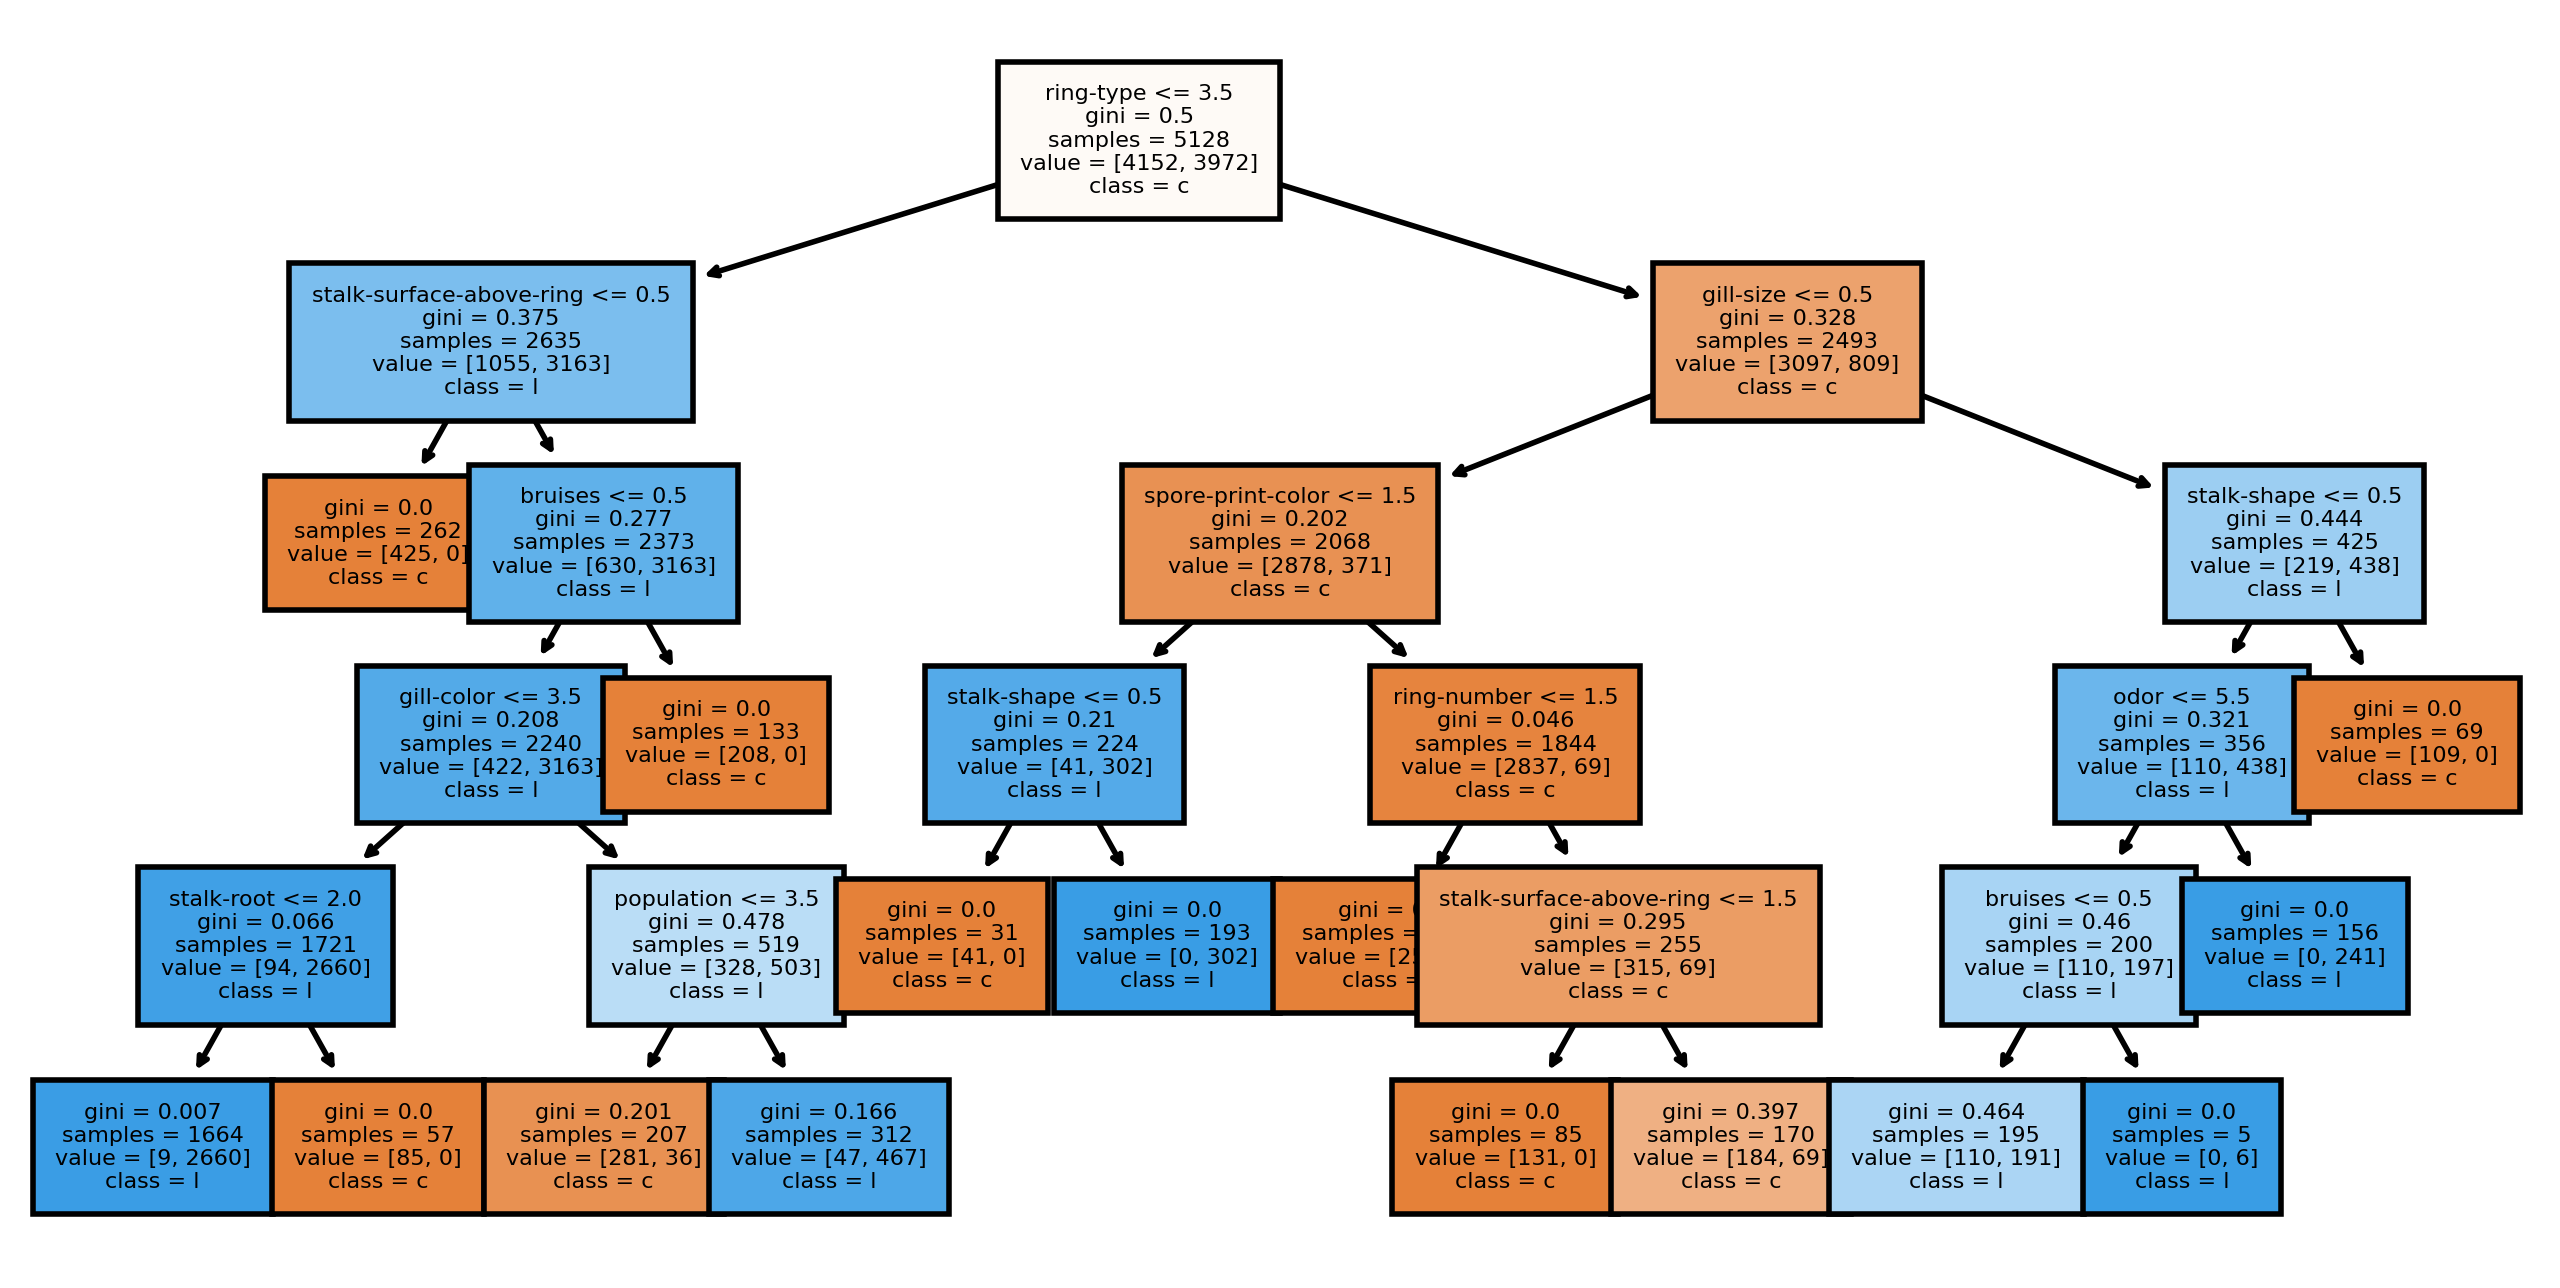

In [15]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 4), dpi = 400)
tree.plot_tree(clf.estimators_[0],
               feature_names = X.columns, 
               class_names = 'class',
               filled = True, fontsize = 4);
plt.show()

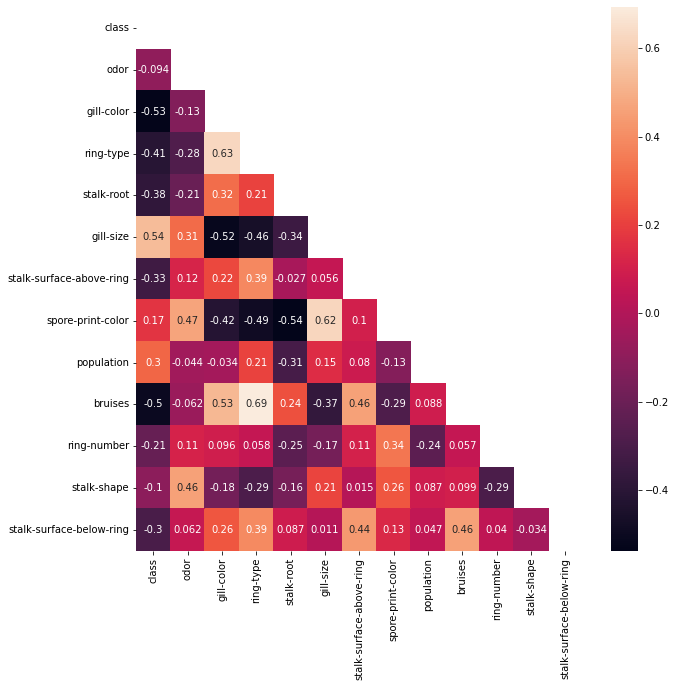

In [16]:
# The heat map is an excellent tool to study the relationship among features taken two at a time (important for the bayesian model)
# In the heat map we can see that it shows strong positive (lighter colors) and strong negative (darker colors) realtions among the features.
# For example we can see that stalk-surface-below-ring has a positive correlation to the bruises and stalk-surface-above the ring
# Likewise gill-color has a negative relation with the output itself.
# THus, using the information from random forest and heatmaps we can set the basic structure for the bayesian model.
fig, ax = plt.subplots(figsize=(10, 10)) 
corr = df[df.columns].corr()
matrix = np.triu(corr)
sns.heatmap(corr, mask = matrix, annot=True)

In [50]:
model=BayesianModel([('stalk-surface-below-ring', 'stalk-surface-above-ring'), 
                     ('stalk-surface-below-ring', 'bruises'), ('stalk-shape', 'odor'), 
                     ('stalk-shape', 'ring-number'), ('ring-number', 'spore-print-color'), 
                     ('bruises', 'ring-type'), ('bruises', 'class'), ('population', 'stalk-root'), 
                     ('spore-print-color', 'gill-color'), ('spore-print-color', 'gill-size'), 
                     ('spore-print-color', 'stalk-root'), ('spore-print-color', 'ring-type'), 
                     ('stalk-surface-above-ring', 'ring-type'), ('gill-size', 'class'), ('gill-size', 'gill-color'), 
                     ('stalk-root', 'class'), ('ring-type', 'class'), ('ring-type', 'gill-color'), 
                     ('gill-color', 'class')])

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


**Display all the Nodes of the Model**

In [51]:
print('Nodes',model.nodes(),'\n')

Nodes ['stalk-surface-below-ring', 'stalk-surface-above-ring', 'bruises', 'stalk-shape', 'odor', 'ring-number', 'spore-print-color', 'ring-type', 'class', 'population', 'stalk-root', 'gill-color', 'gill-size'] 



**Display all the edges of the model**

In [19]:
print('Edges',model.edges())

Edges [('stalk-surface-below-ring', 'stalk-surface-above-ring'), ('stalk-surface-below-ring', 'bruises'), ('stalk-surface-above-ring', 'ring-type'), ('bruises', 'ring-type'), ('bruises', 'class'), ('stalk-shape', 'odor'), ('stalk-shape', 'ring-number'), ('ring-number', 'spore-print-color'), ('spore-print-color', 'gill-color'), ('spore-print-color', 'gill-size'), ('spore-print-color', 'stalk-root'), ('spore-print-color', 'ring-type'), ('ring-type', 'class'), ('ring-type', 'gill-color'), ('population', 'stalk-root'), ('stalk-root', 'class'), ('gill-color', 'class'), ('gill-size', 'class'), ('gill-size', 'gill-color')]


**MODEL DIAGRAM**

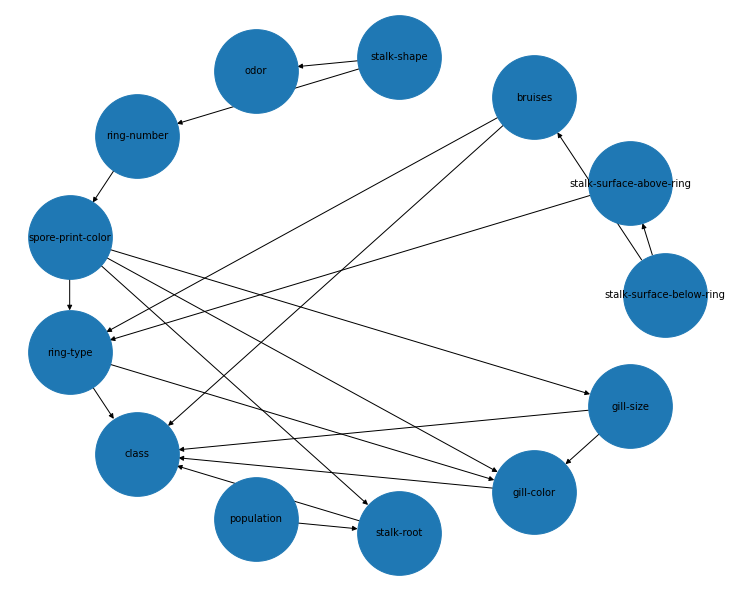

In [58]:
plt.figure(figsize=(10,8))
nx.draw_circular(model, with_labels=True, node_size=7000, font_size=10, node_shape = "o")
plt.show()

#### **CPT** <br>

The CPT is learned, by Estimator, taking into consideration about pros and cons of the estimator. I have choossen Bayesian Estimator as it is more robust. 
Pgmpy also offer a variety of possible priors, among them a possible choice is Bayesian Dirichlet equivalent uniform prior (BDeu), chosen with its default settings (i.e. equivalent_sample_size equal to 5). Then the CPT are displayed.

In [21]:
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))

model.cpds = []
model.fit(data=df,
          estimator=BayesianEstimator,
          prior_type="BDeu",
          equivalent_sample_size=10,
          complete_samples_only=False)

print(f'Check model: {model.check_model()}\n')
for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd, '\n')

Check model: True

CPT of stalk-surface-below-ring:
+-----------------------------+-----------+
| stalk-surface-below-ring(0) | 0.0740718 |
+-----------------------------+-----------+
| stalk-surface-below-ring(1) | 0.283563  |
+-----------------------------+-----------+
| stalk-surface-below-ring(2) | 0.607143  |
+-----------------------------+-----------+
| stalk-surface-below-ring(3) | 0.0352225 |
+-----------------------------+-----------+ 

CPT of stalk-surface-above-ring:
+-----------------------------+-----+-----------------------------+
| stalk-surface-below-ring    | ... | stalk-surface-below-ring(3) |
+-----------------------------+-----+-----------------------------+
| stalk-surface-above-ring(0) | ... | 0.002181500872600349        |
+-----------------------------+-----+-----------------------------+
| stalk-surface-above-ring(1) | ... | 0.2395287958115183          |
+-----------------------------+-----+-----------------------------+
| stalk-surface-above-ring(2) | ... | 0.6

### **NETWORK ANALYSIS** <br>


#### **INDEPENDENCIES** <br>
Here I am viewing the local independencies of each node.

In [23]:
# Local indenpencies of each node
for i in model.nodes():
  print(" Independencies :",i,'\n',model.local_independencies(i))
  print(" Descendants :",i,'\n',model.get_children(i))
  print('\n')

 Independencies : stalk-surface-below-ring 
 (stalk-surface-below-ring ⟂ odor, stalk-root, ring-number, gill-size, population, stalk-shape, spore-print-color)
 Descendants : stalk-surface-below-ring 
 ['stalk-surface-above-ring', 'bruises']


 Independencies : stalk-surface-above-ring 
 (stalk-surface-above-ring ⟂ odor, population, ring-number, stalk-shape, stalk-root, gill-size, bruises, spore-print-color | stalk-surface-below-ring)
 Descendants : stalk-surface-above-ring 
 ['ring-type']


 Independencies : bruises 
 (bruises ⟂ odor, population, ring-number, stalk-surface-above-ring, stalk-root, gill-size, stalk-shape, spore-print-color | stalk-surface-below-ring)
 Descendants : bruises 
 ['ring-type', 'class']


 Independencies : stalk-shape 
 (stalk-shape ⟂ stalk-surface-below-ring, stalk-surface-above-ring, population, bruises)
 Descendants : stalk-shape 
 ['odor', 'ring-number']


 Independencies : odor 
 (odor ⟂ bruises, ring-number, ring-type, stalk-surface-above-ring, gill-colo

### **Markov Blanket and Active Trails**

**markov blanket()** which returns the set of node’s parents, its children and its children’s other parents<br>
**active_trails_of()** returns all the nodes reachable from start via an active trail

In [24]:
#  Checking the markov blanket of each node
for i in model.nodes():
  print("Markov Blanket: ",i,'\n',model.get_markov_blanket(i))
  print('\n')

Markov Blanket:  stalk-surface-below-ring 
 ['stalk-surface-above-ring', 'bruises']


Markov Blanket:  stalk-surface-above-ring 
 ['ring-type', 'bruises', 'stalk-surface-below-ring', 'spore-print-color']


Markov Blanket:  bruises 
 ['ring-type', 'stalk-surface-above-ring', 'gill-color', 'stalk-root', 'gill-size', 'stalk-surface-below-ring', 'class', 'spore-print-color']


Markov Blanket:  stalk-shape 
 ['odor', 'ring-number']


Markov Blanket:  odor 
 ['stalk-shape']


Markov Blanket:  ring-number 
 ['stalk-shape', 'spore-print-color']


Markov Blanket:  spore-print-color 
 ['bruises', 'ring-number', 'ring-type', 'stalk-surface-above-ring', 'gill-color', 'stalk-root', 'gill-size', 'population']


Markov Blanket:  ring-type 
 ['stalk-surface-above-ring', 'gill-color', 'stalk-root', 'gill-size', 'bruises', 'class', 'spore-print-color']


Markov Blanket:  class 
 ['ring-type', 'gill-color', 'stalk-root', 'gill-size', 'bruises']


Markov Blanket:  population 
 ['spore-print-color', 'stalk

In [25]:
# Checking active trails between variables with  evidence
def active_trails_of(query, evidence):
    a = model.active_trail_nodes(query, observed=evidence).get(query)
    a.remove(query)
    if a:
        if evidence:
            print(f'Active trails between \'{query}\' and {a} given the evidence {set(evidence)}.')
        else:
            print(f'Active trails between \'{query}\' and {a} given no evidence.')
    else:
        print(f'No Active trails for \'{query}\' given the evidence {set(evidence)}.')

active_trails_of(query='class', evidence=[])
active_trails_of(query='class', evidence=['population'])
active_trails_of(query='class', evidence=[])
active_trails_of(query='population', evidence=['ring-type','gill-color'])
active_trails_of(query='bruises', evidence=[])

# Checking d-separation between variables without evidence
model.is_dconnected("population","class")
model.active_trail_nodes('bruises')


Active trails between 'class' and {'population', 'odor', 'ring-number', 'ring-type', 'stalk-surface-above-ring', 'gill-color', 'stalk-shape', 'stalk-root', 'gill-size', 'bruises', 'stalk-surface-below-ring', 'spore-print-color'} given no evidence.
Active trails between 'class' and {'odor', 'ring-number', 'ring-type', 'stalk-surface-above-ring', 'gill-color', 'stalk-shape', 'stalk-root', 'gill-size', 'bruises', 'stalk-surface-below-ring', 'spore-print-color'} given the evidence {'population'}.
Active trails between 'class' and {'population', 'odor', 'ring-number', 'ring-type', 'stalk-surface-above-ring', 'gill-color', 'stalk-shape', 'stalk-root', 'gill-size', 'bruises', 'stalk-surface-below-ring', 'spore-print-color'} given no evidence.
Active trails between 'population' and {'class', 'stalk-root'} given the evidence {'gill-color', 'ring-type'}.
Active trails between 'bruises' and {'gill-color', 'ring-type', 'class', 'stalk-surface-below-ring', 'stalk-surface-above-ring'} given no evide

{'bruises': {'bruises',
  'class',
  'gill-color',
  'ring-type',
  'stalk-surface-above-ring',
  'stalk-surface-below-ring'}}

**FINDING PARENT AND CHILD OF TARGET**

In [26]:
model.get_children("class")
model.get_parents("class")

['bruises', 'gill-size', 'stalk-root', 'ring-type', 'gill-color']

### **Variable Elimination Queries**

Variable elimination(VE) is an algorithm to perform inference on Bayesian networks by manipulating conditional probabilities in the form of factors. Each node in a Bayesian network is equipped with a conditional probability function that expresses the likelihood that the node will take on different values given the values of its parents. Thus, given the probabilistic model created, I am interested in using this algorithm to find out the probability of a mushroom being edible.

In [27]:
Mushroom_Edibility = VariableElimination(model)

In [61]:
# queries: status of the class given one other feature
# This custom function takes a feature at a time and iterates through all possible state sthat the variables can be in
# And given the state of a particular feature we can determine what is the probability of the output, in our case the edibility of the mushroom

def model_query(df, feature, target):
    for i in (list(df[feature].value_counts().index)):
      print(f"Probability of a Mushroom being edible given the {feature}:",i, encoding_dict[feature][i])
      print(Mushroom_Edibility.query([target], evidence={feature:i}))

In [62]:
# Iterating through all the features in order to determine the probability of mushroom being edible give n the status of a feature.

features = list(df.columns)
features.remove("class")
for col in features:
    print(f"Checking probabity of edibility given {col}")
    model_query(df, col, 'class')
    print("###########")

Checking probabity of edibility given odor
Probability of a Mushroom being edible given the odor: 5 n


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5096 |
+----------+--------------+
| class(1) |       0.4904 |
+----------+--------------+
Probability of a Mushroom being edible given the odor: 2 f


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5037 |
+----------+--------------+
| class(1) |       0.4963 |
+----------+--------------+
Probability of a Mushroom being edible given the odor: 8 y


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5151 |
+----------+--------------+
| class(1) |       0.4849 |
+----------+--------------+
Probability of a Mushroom being edible given the odor: 7 s


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5151 |
+----------+--------------+
| class(1) |       0.4849 |
+----------+--------------+
Probability of a Mushroom being edible given the odor: 0 a


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.4985 |
+----------+--------------+
| class(1) |       0.5015 |
+----------+--------------+
Probability of a Mushroom being edible given the odor: 3 l


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.4985 |
+----------+--------------+
| class(1) |       0.5015 |
+----------+--------------+
Probability of a Mushroom being edible given the odor: 6 p


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.4962 |
+----------+--------------+
| class(1) |       0.5038 |
+----------+--------------+
Probability of a Mushroom being edible given the odor: 1 c


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.4962 |
+----------+--------------+
| class(1) |       0.5038 |
+----------+--------------+
Probability of a Mushroom being edible given the odor: 4 m


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.4965 |
+----------+--------------+
| class(1) |       0.5035 |
+----------+--------------+
###########
Checking probabity of edibility given gill-color
Probability of a Mushroom being edible given the gill-color: 0 b


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.2940 |
+----------+--------------+
| class(1) |       0.7060 |
+----------+--------------+
Probability of a Mushroom being edible given the gill-color: 7 p


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5689 |
+----------+--------------+
| class(1) |       0.4311 |
+----------+--------------+
Probability of a Mushroom being edible given the gill-color: 10 w


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.6563 |
+----------+--------------+
| class(1) |       0.3437 |
+----------+--------------+
Probability of a Mushroom being edible given the gill-color: 5 n


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.6607 |
+----------+--------------+
| class(1) |       0.3393 |
+----------+--------------+
Probability of a Mushroom being edible given the gill-color: 2 g


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.3241 |
+----------+--------------+
| class(1) |       0.6759 |
+----------+--------------+
Probability of a Mushroom being edible given the gill-color: 3 h


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.3197 |
+----------+--------------+
| class(1) |       0.6803 |
+----------+--------------+
Probability of a Mushroom being edible given the gill-color: 9 u


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.6225 |
+----------+--------------+
| class(1) |       0.3775 |
+----------+--------------+
Probability of a Mushroom being edible given the gill-color: 4 k


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5462 |
+----------+--------------+
| class(1) |       0.4538 |
+----------+--------------+
Probability of a Mushroom being edible given the gill-color: 1 e


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5826 |
+----------+--------------+
| class(1) |       0.4174 |
+----------+--------------+
Probability of a Mushroom being edible given the gill-color: 11 y


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5219 |
+----------+--------------+
| class(1) |       0.4781 |
+----------+--------------+
Probability of a Mushroom being edible given the gill-color: 6 o


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5307 |
+----------+--------------+
| class(1) |       0.4693 |
+----------+--------------+
Probability of a Mushroom being edible given the gill-color: 8 r


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.4837 |
+----------+--------------+
| class(1) |       0.5163 |
+----------+--------------+
###########
Checking probabity of edibility given ring-type
Probability of a Mushroom being edible given the ring-type: 4 p


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.6316 |
+----------+--------------+
| class(1) |       0.3684 |
+----------+--------------+
Probability of a Mushroom being edible given the ring-type: 0 e


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.4413 |
+----------+--------------+
| class(1) |       0.5587 |
+----------+--------------+
Probability of a Mushroom being edible given the ring-type: 2 l


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.2500 |
+----------+--------------+
| class(1) |       0.7500 |
+----------+--------------+
Probability of a Mushroom being edible given the ring-type: 1 f


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5008 |
+----------+--------------+
| class(1) |       0.4992 |
+----------+--------------+
Probability of a Mushroom being edible given the ring-type: 3 n


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.4960 |
+----------+--------------+
| class(1) |       0.5040 |
+----------+--------------+
###########
Checking probabity of edibility given stalk-root
Probability of a Mushroom being edible given the stalk-root: 1 b


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5338 |
+----------+--------------+
| class(1) |       0.4662 |
+----------+--------------+
Probability of a Mushroom being edible given the stalk-root: 0 ?


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.3889 |
+----------+--------------+
| class(1) |       0.6111 |
+----------+--------------+
Probability of a Mushroom being edible given the stalk-root: 3 e


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5835 |
+----------+--------------+
| class(1) |       0.4165 |
+----------+--------------+
Probability of a Mushroom being edible given the stalk-root: 2 c


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5725 |
+----------+--------------+
| class(1) |       0.4275 |
+----------+--------------+
Probability of a Mushroom being edible given the stalk-root: 4 r


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5914 |
+----------+--------------+
| class(1) |       0.4086 |
+----------+--------------+
###########
Checking probabity of edibility given gill-size
Probability of a Mushroom being edible given the gill-size: 0 b


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5642 |
+----------+--------------+
| class(1) |       0.4358 |
+----------+--------------+
Probability of a Mushroom being edible given the gill-size: 1 n


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.3790 |
+----------+--------------+
| class(1) |       0.6210 |
+----------+--------------+
###########
Checking probabity of edibility given stalk-surface-above-ring
Probability of a Mushroom being edible given the stalk-surface-above-ring: 2 s


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5635 |
+----------+--------------+
| class(1) |       0.4365 |
+----------+--------------+
Probability of a Mushroom being edible given the stalk-surface-above-ring: 1 k


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.3871 |
+----------+--------------+
| class(1) |       0.6129 |
+----------+--------------+
Probability of a Mushroom being edible given the stalk-surface-above-ring: 0 f


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.4912 |
+----------+--------------+
| class(1) |       0.5088 |
+----------+--------------+
Probability of a Mushroom being edible given the stalk-surface-above-ring: 3 y


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5172 |
+----------+--------------+
| class(1) |       0.4828 |
+----------+--------------+
###########
Checking probabity of edibility given spore-print-color
Probability of a Mushroom being edible given the spore-print-color: 7 w


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.4006 |
+----------+--------------+
| class(1) |       0.5994 |
+----------+--------------+
Probability of a Mushroom being edible given the spore-print-color: 3 n


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.6060 |
+----------+--------------+
| class(1) |       0.3940 |
+----------+--------------+
Probability of a Mushroom being edible given the spore-print-color: 2 k


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.6123 |
+----------+--------------+
| class(1) |       0.3877 |
+----------+--------------+
Probability of a Mushroom being edible given the spore-print-color: 1 h


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.4120 |
+----------+--------------+
| class(1) |       0.5880 |
+----------+--------------+
Probability of a Mushroom being edible given the spore-print-color: 5 r


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.4764 |
+----------+--------------+
| class(1) |       0.5236 |
+----------+--------------+
Probability of a Mushroom being edible given the spore-print-color: 6 u


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5566 |
+----------+--------------+
| class(1) |       0.4434 |
+----------+--------------+
Probability of a Mushroom being edible given the spore-print-color: 4 o


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.6174 |
+----------+--------------+
| class(1) |       0.3826 |
+----------+--------------+
Probability of a Mushroom being edible given the spore-print-color: 8 y


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.6174 |
+----------+--------------+
| class(1) |       0.3826 |
+----------+--------------+
Probability of a Mushroom being edible given the spore-print-color: 0 b


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.6174 |
+----------+--------------+
| class(1) |       0.3826 |
+----------+--------------+
###########
Checking probabity of edibility given population
Probability of a Mushroom being edible given the population: 4 v


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.4957 |
+----------+--------------+
| class(1) |       0.5043 |
+----------+--------------+
Probability of a Mushroom being edible given the population: 5 y


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5449 |
+----------+--------------+
| class(1) |       0.4551 |
+----------+--------------+
Probability of a Mushroom being edible given the population: 3 s


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.4815 |
+----------+--------------+
| class(1) |       0.5185 |
+----------+--------------+
Probability of a Mushroom being edible given the population: 2 n


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5016 |
+----------+--------------+
| class(1) |       0.4984 |
+----------+--------------+
Probability of a Mushroom being edible given the population: 0 a


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5404 |
+----------+--------------+
| class(1) |       0.4596 |
+----------+--------------+
Probability of a Mushroom being edible given the population: 1 c


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5101 |
+----------+--------------+
| class(1) |       0.4899 |
+----------+--------------+
###########
Checking probabity of edibility given bruises
Probability of a Mushroom being edible given the bruises: 0 f


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.4265 |
+----------+--------------+
| class(1) |       0.5735 |
+----------+--------------+
Probability of a Mushroom being edible given the bruises: 1 t


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.6200 |
+----------+--------------+
| class(1) |       0.3800 |
+----------+--------------+
###########
Checking probabity of edibility given ring-number
Probability of a Mushroom being edible given the ring-number: 1 o


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5152 |
+----------+--------------+
| class(1) |       0.4848 |
+----------+--------------+
Probability of a Mushroom being edible given the ring-number: 2 t


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.4104 |
+----------+--------------+
| class(1) |       0.5896 |
+----------+--------------+
Probability of a Mushroom being edible given the ring-number: 0 n


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.4129 |
+----------+--------------+
| class(1) |       0.5871 |
+----------+--------------+
###########
Checking probabity of edibility given stalk-shape
Probability of a Mushroom being edible given the stalk-shape: 1 t


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5151 |
+----------+--------------+
| class(1) |       0.4849 |
+----------+--------------+
Probability of a Mushroom being edible given the stalk-shape: 0 e


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.4962 |
+----------+--------------+
| class(1) |       0.5038 |
+----------+--------------+
###########
Checking probabity of edibility given stalk-surface-below-ring
Probability of a Mushroom being edible given the stalk-surface-below-ring: 2 s


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5615 |
+----------+--------------+
| class(1) |       0.4385 |
+----------+--------------+
Probability of a Mushroom being edible given the stalk-surface-below-ring: 1 k


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.3868 |
+----------+--------------+
| class(1) |       0.6132 |
+----------+--------------+
Probability of a Mushroom being edible given the stalk-surface-below-ring: 0 f


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.4972 |
+----------+--------------+
| class(1) |       0.5028 |
+----------+--------------+
Probability of a Mushroom being edible given the stalk-surface-below-ring: 3 y


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.5539 |
+----------+--------------+
| class(1) |       0.4461 |
+----------+--------------+
###########


In [63]:
# Causal inference: Will a mushroom be edible given its stalk-root and stalk-surface-above-ring conditions?
causal_query = Mushroom_Edibility.query(['class'], evidence = {'stalk-root': 1,'stalk-surface-above-ring': 2})
print('Probabity of edibility| given stalk-root = 1: {feature1}, stalk-surface-above-ring = 2: {feature2}'.format(feature1 = encoding_dict['stalk-surface-above-ring'][1], feature2 = encoding_dict['stalk-root'][2]))
print(causal_query)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Probabity of edibility| given stalk-root = 1: k, stalk-surface-above-ring = 2: c
+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.6099 |
+----------+--------------+
| class(1) |       0.3901 |
+----------+--------------+


In [64]:
# Causal inference: Will a mushroom be edible given its gill-size and bruises conditions?
causal_query = Mushroom_Edibility.query(['class'], evidence = {'gill-size': 1, 'bruises': 0})
print('Probabity of edibility| gill-size = 1: {feature1}, bruises = 0: {feature2}'.format(feature1 = encoding_dict['gill-size'][1], feature2 = encoding_dict['bruises'][0]))
print(causal_query)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Probabity of edibility| gill-size = 1: n, bruises = 0: f
+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.2695 |
+----------+--------------+
| class(1) |       0.7305 |
+----------+--------------+


In [65]:
# Causal inference: Will a mushroom be edible given its odor and population conditions?
causal_query = Mushroom_Edibility.query(['class'], evidence = {'odor': 1, 'population': 3})
print('Probabity of edibility| odor = 1: {feature1}, population = 3: {feature2}'.format(feature1 = encoding_dict['odor'][1], feature2 = encoding_dict['population'][3]))
print(causal_query)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Probabity of edibility| odor = 1: c, population = 3: s
+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.4697 |
+----------+--------------+
| class(1) |       0.5303 |
+----------+--------------+
